In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
datadir_cho = './data/Cho_Braak_w_hipp_labels_gk/'
fnames = os.listdir(datadir_cho)

In [3]:
graphs = dict()
for idx, fname in enumerate(fnames):
    graphs[fname] = nx.read_gpickle(os.path.join(datadir_cho,fname))

In [4]:
adjs = np.zeros((2, 7, len(fnames)))
for idx, graph in enumerate(graphs.values()):
    tmp = nx.adj_matrix(graph).todense()[-2:, :]
    adjs[:, :, idx] = tmp

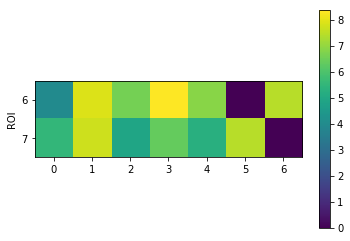

In [6]:
average_cho = np.mean(adjs, axis=2)
plt.imshow(np.log(average_cho+1))
plt.yticks([0, 1], [6,7])
plt.ylabel('ROI')
plt.colorbar()
plt.show()

In [7]:
for_test = adjs[:,0,:]

In [8]:
for_test.shape

(2, 114)

In [9]:
import scipy.stats as stats

In [10]:
stats.ttest_ind(for_test[0,:],for_test[1,:])

Ttest_indResult(statistic=-9.557951669645778, pvalue=2.1376527152142656e-18)

In [13]:
import seaborn as sns
import pandas

In [24]:
jnk = pandas.DataFrame(index=range(for_test.shape[1]*2),columns = ['connections to ERC','region'])
jnk.loc[jnk.index[:for_test.shape[1]],'connections to ERC'] = for_test[0,:]
jnk.loc[jnk.index[for_test.shape[1]]:,'connections to ERC'] = for_test[1,:]
jnk.loc[jnk.index[:for_test.shape[1]],'region'] = ['noise/subcortex'] * for_test.shape[1]
jnk.loc[jnk.index[for_test.shape[1]]:,'region'] = ['early tau'] * for_test.shape[1]

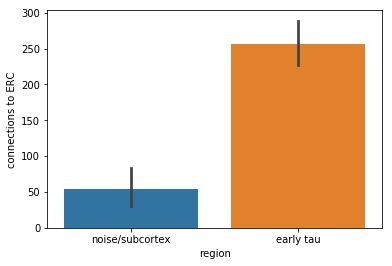

In [25]:
sns.barplot(x='region',y='connections to ERC',data=jnk)

In [26]:
fadjs = np.zeros((7, 7, len(fnames)))
for idx, graph in enumerate(graphs.values()):
    tmp = nx.adj_matrix(graph).todense()
    fadjs[:, :, idx] = tmp

In [30]:
np.save('cho_connection_matrix', fadjs, allow_pickle=False)